In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import datasets
sns.set_style('whitegrid')
%matplotlib inline

In [9]:
iris = datasets.load_iris()
X = iris.data
Y= iris.target

In [10]:
from sklearn.svm import SVC

In [11]:
model = SVC()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [24]:
model.fit(X_train, Y_train)

/home/acatejr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
from sklearn import metrics
predicted = model.predict(X_test)
expected = Y_test

In [22]:
print(metrics.accuracy_score(expected, predicted))

0.9473684210526315


In [25]:
from sklearn import svm

In [26]:
X = iris.data[:,:2]
Y = iris.target

In [28]:
C = 1.0

In [29]:
svc = svm.SVC(kernel='linear', C=C).fit(X,Y)

In [32]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X,Y)

In [36]:
poly_svc = svm.SVC(kernel='poly', degree=3, C=C, gamma=.1).fit(X,Y)

In [38]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

/home/acatejr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [40]:
h = 0.02
x_min = X[:,0].min()-1
x_max = X[:,0].max()+1


In [41]:
y_min = X[:,1].min()-1
y_max = X[:,1].max()+1

In [44]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [46]:
titles = ['SVC with Linear Kernel', 'LinearSVC (linear kernel)', 'SVC with RBF kernel', 'SVC with Polynomial (degree 3) kernel']

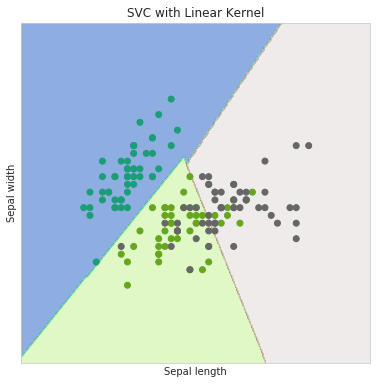

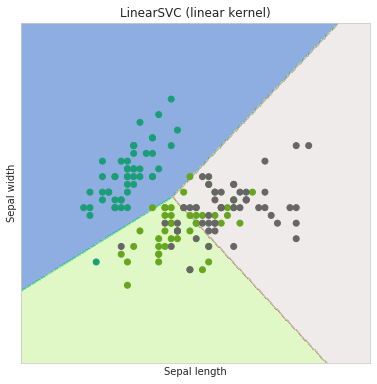

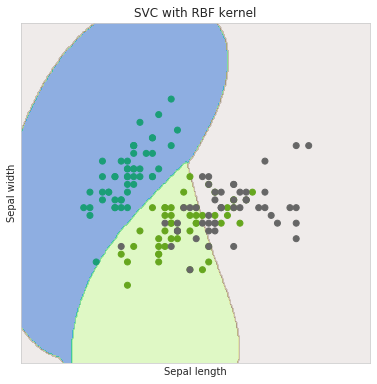

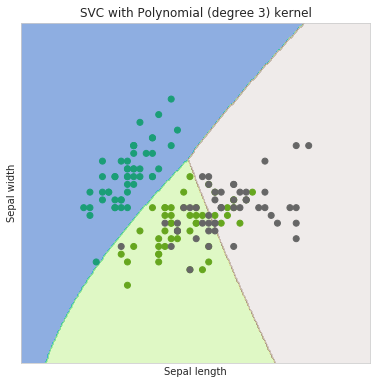

In [63]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.figure(figsize=(15,15))
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Dark2)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])